In [76]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

### 1. Data Exploration and Visualization

In [11]:
house_df = pd.read_csv("Melbourne_housing.csv")

In [12]:
house_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Thornbury,7/67 Pender St,2,u,438000.0,SP,Love,22/08/2016,6.5,3071,...,1.0,1.0,0.0,66.0,1970.0,Darebin City Council,-37.7541,145.0088,Northern Metropolitan,8870
1,Coburg,32 Rose St,2,h,901000.0,S,Peter,27/06/2016,7.8,3058,...,1.0,1.0,545.0,107.0,1940.0,Darebin City Council,-37.7445,144.9471,Northern Metropolitan,11204
2,Bentleigh East,2/25 Brooks St,3,u,800000.0,S,Woodards,28/05/2016,13.9,3165,...,2.0,2.0,261.0,NaN,NaN,Glen Eira City Council,-37.9163,145.0779,Southern Metropolitan,10969
3,Templestowe Lower,2/35 John St,3,t,1155000.0,S,Jellis,25/11/2017,12.4,3107,...,NaN,NaN,NaN,NaN,NaN,Manningham City Council,NaN,NaN,Eastern Metropolitan,5420
4,South Yarra,1/35 Marne St,3,u,1630000.0,PI,Jellis,10/9/2016,3.3,3141,...,1.0,1.0,0.0,NaN,NaN,Melbourne City Council,-37.8359,144.9839,Southern Metropolitan,14887


In [13]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         499 non-null    object 
 1   Address        499 non-null    object 
 2   Rooms          499 non-null    int64  
 3   Type           499 non-null    object 
 4   Price          391 non-null    float64
 5   Method         499 non-null    object 
 6   SellerG        499 non-null    object 
 7   Date           499 non-null    object 
 8   Distance       499 non-null    float64
 9   Postcode       499 non-null    int64  
 10  Bedroom2       371 non-null    float64
 11  Bathroom       371 non-null    float64
 12  Car            362 non-null    float64
 13  Landsize       325 non-null    float64
 14  BuildingArea   189 non-null    float64
 15  YearBuilt      212 non-null    float64
 16  CouncilArea    499 non-null    object 
 17  Lattitude      377 non-null    float64
 18  Longtitude

In [14]:
columns_to_drop = []
def cal_missing(df):
    for col in df.columns.tolist():
        missing = round(100*(df[col].isnull().sum()/len(df[col])),2)
        print(f'{col} missing values : {missing}')
        if missing >30:
            columns_to_drop.append(col)

In [15]:
cal_missing(house_df)
print('\n')
print(columns_to_drop)

Suburb missing values : 0.0
Address missing values : 0.0
Rooms missing values : 0.0
Type missing values : 0.0
Price missing values : 21.64
Method missing values : 0.0
SellerG missing values : 0.0
Date missing values : 0.0
Distance missing values : 0.0
Postcode missing values : 0.0
Bedroom2 missing values : 25.65
Bathroom missing values : 25.65
Car missing values : 27.45
Landsize missing values : 34.87
BuildingArea missing values : 62.12
YearBuilt missing values : 57.52
CouncilArea missing values : 0.0
Lattitude missing values : 24.45
Longtitude missing values : 24.45
Regionname missing values : 0.0
Propertycount missing values : 0.0


['Landsize', 'BuildingArea', 'YearBuilt']


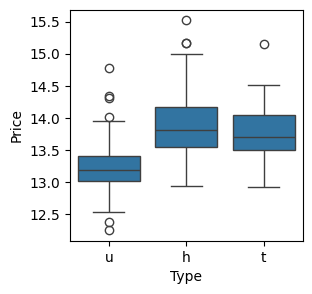

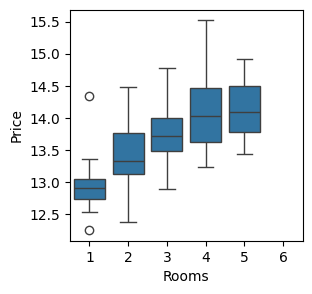

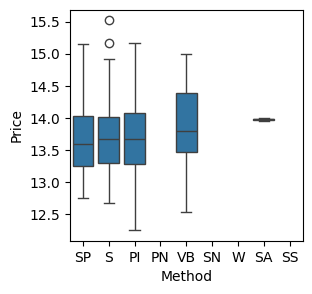

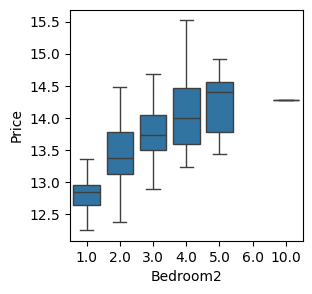

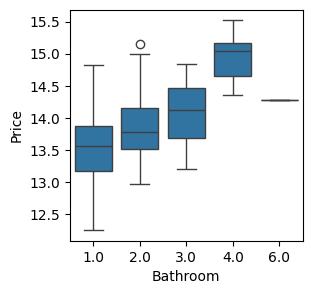

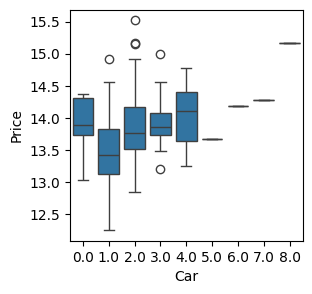

In [16]:
## Analyzing categorical columns 
cat_col = ['Type', 'Rooms', 'Method','Bedroom2', 'Bathroom', 'Car']
for col in cat_col:
    plt.figure(figsize = (3,3))
    sns.boxplot(y=np.log(house_df["Price"]), x= house_df[col])
    plt.show()

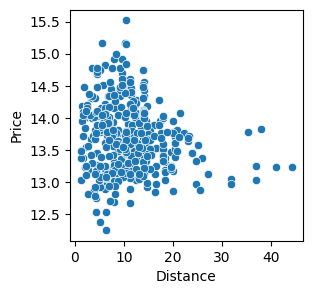

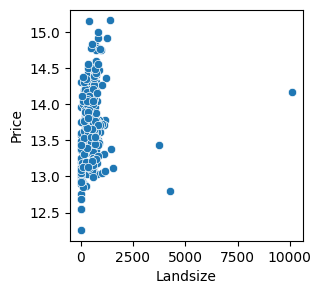

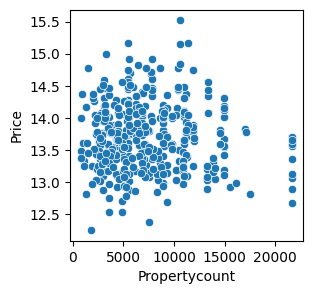

In [17]:
## Analyzing Numerical columns 
num_cols = ['Distance','Landsize', 'Propertycount']
for col in num_cols:
    plt.figure(figsize = (3,3))
    sns.scatterplot(y=np.log(house_df["Price"]), x= house_df[col])
    plt.show()

/var/folders/ly/npw69p7x4lg1l7s7mm3y7twm0000gn/T/ipykernel_22773/3428445405.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df["Price"])


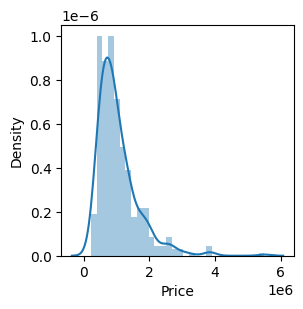

In [18]:
## checking the distribution of Price (target Variable) after using log transformation
plt.figure(figsize=(3,3))
sns.distplot(house_df["Price"])
plt.show()

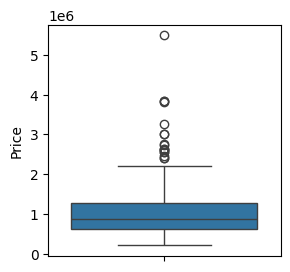

In [19]:
## checking the box plot without log transformation for looking at outliers
plt.figure(figsize=(3,3))
sns.boxplot(house_df["Price"])
plt.show()

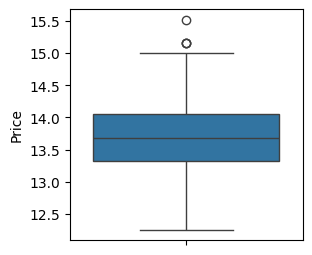

In [20]:
## checking the box plot after log transforming to check if we could treat those outliers
plt.figure(figsize=(3,3))
sns.boxplot(np.log(house_df["Price"]))
plt.show()

Interpretations
- The Target variable - price is not normally distributed with plenty of outliers. Using log Transformation helps in normally distributing it.  

- Categorical Variables like Bedrooms, bathrooms, car parks seem to have an impact on the price distribution. Higher the number of bedrooms, car parks, bathroom, the higher the sales price.

- There are two columns ['BuildingArea', 'YearBuilt'] which have more than 40% of data as null.

- The column Landsize doesn't have a normally distributed datapoints and has a lot of zeros. We might need to use log transformation for this but this may not work since using log on 0 gives negative infinity. 

### 2. Linear Regression Model Development

Preprocess the data as necessary (handling missing values, encoding categorical variables, removing unnecessary columns etc.).

In [21]:
## Dropping the variables with more than 30% missing values
print(columns_to_drop)
house_df = house_df.drop(columns=columns_to_drop,axis =1)

['Landsize', 'BuildingArea', 'YearBuilt']


In [22]:
## Recognized further unnecessary variables which will not have impact on our target variable
house_df = house_df.drop(columns=['Address','Date','Lattitude', 'Longtitude'])

In [23]:
## Removing the rows which have null values under our Target Variable
house_df= house_df.dropna(subset=["Price"])
## Checking for remaining null values
house_df.isnull().sum()

Suburb            0
Rooms             0
Type              0
Price             0
Method            0
SellerG           0
Distance          0
Postcode          0
Bedroom2         92
Bathroom         92
Car              99
CouncilArea       0
Regionname        0
Propertycount     0
dtype: int64

In [24]:
## We will use KNN imputer to fill the missing data in the three columns since all of them are categorical variables and 
## KNN imputer does well since it is a multivariate imputer.

imputer = KNNImputer(n_neighbors=5)
house_df['Bedroom2'] = imputer.fit_transform(house_df[['Bedroom2']])
house_df['Bathroom'] = imputer.fit_transform(house_df[['Bathroom']])
house_df['Car'] = imputer.fit_transform(house_df[['Car']])

In [25]:
## Checking for remaining null values
house_df.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [26]:
## Log Transforming the Target Variable to make it normally distributed.
house_df["Price"] = np.log(house_df["Price"])

In [27]:
house_df.shape

(391, 14)

Cleaning the data (steps) 

- Dropped the variables with more than 30% missing values i.e ['Landsize', 'BuildingArea', 'YearBuilt']
  
- Recognized further unnecessary variables which will not have impact on our target variable i.e ['Address','Date','Lattitude',
  'Longtitude']

- Used KNN imputer to fill the missing data in the three columns [Bedroom2, Bathroom, Car] since they were categorical variables.

- Log Transforming the Target Variable to make it normally distributed. Also, dropped all rows which had null in the target variable column.

- We are left with 391 rows of data and 14 columns (13 predictor variables and 1 Target variable)

In [45]:
house_df['Suburb'].value_counts()

Suburb
129    10
149     9
154     8
18      8
112     8
       ..
92      1
43      1
12      1
111     1
142     1
Name: count, Length: 172, dtype: int64

In [28]:
house_df.dtypes

Suburb            object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Distance         float64
Postcode           int64
Bedroom2         float64
Bathroom         float64
Car              float64
CouncilArea       object
Regionname        object
Propertycount      int64
dtype: object

In [29]:
## Now we will split the columns in to numerical columns and categorical columns
label_encod_cols = ['Suburb', 'SellerG','Postcode','CouncilArea' ]
one_hot_encod_cols = ['Method','Type','Regionname']
numerical_cols = ['Distance', 'Propertycount']
no_change_cols = ['Rooms', 'Bedroom2','float64','Car']

# The purpose here is all categorical columns with more than 50 different categories are label encoded and the rest are one hot encoded. The reason being to keep the dimension under control for better interpretability.
# The numerical columns are seperated so that we can use scalar transform
# Some columns like "rooms", "Bedroom2" have already label encoded date. We will keep it that way since it captures the intuition - more the bedroom higher the price.



In [30]:
## applying label encoding 
label_encoder = LabelEncoder()
for col in label_encod_cols:
    house_df[col] =  label_encoder.fit_transform(house_df[col])


In [31]:
## applying one hot encoding
house_df = pd.get_dummies(house_df, columns=one_hot_encod_cols,dtype='int',drop_first=True)

In [32]:
## applying standard scaler
scaler = StandardScaler()
for col in numerical_cols:
    house_df[col] = scaler.fit_transform(house_df[[col]])

In [33]:
## split the dataset

X = house_df[[col for col in house_df.columns if col != 'Price']]
y = house_df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=19)

## Developing the Linear Regression model 
lr_model = LinearRegression()
## Train the model 
lr_model.fit(X_train,y_train)


LinearRegression()

### 3. Model Evaluation

Evaluate your linear regression model using appropriate metrics.

In [34]:
# Predicting
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [35]:
## For evaluation we will use R-square and RMSE to compare the test results and compare it with train results


### RSME score

rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))

print(f'The RMSE for Train is : {rmse_train:.2f}')

print(f'The RMSE for Test is : {rmse_test :.2f}')

The RMSE for Train is : 0.27
The RMSE for Test is : 0.32


In [36]:
#### R-square score 


rsquare_train = r2_score(y_train,y_train_pred)
rsquare_test = r2_score(y_test,y_test_pred)

print(f'The r-square for Train is : {rsquare_train:.2f}')
print(f'The r-square for Test is : {rsquare_test :.2f}')

The r-square for Train is : 0.75
The r-square for Test is : 0.58


Observation & Interpretation 

- The RMSE for Train set is 0.27 while the RMSE for Test set is 0.32. We can see that the Test set is performing comparatively worse than the Train set. This shows there is a hint of overfitting.

- The r-square for Train is 0.75 while the r-square for Test is 0.58 which shows significant overfitting where the model performs way better on trained data but performs poorly on test data. 
    

### 4. Lasso Regularization

##### QUestion - Is there a need for Lasso regularization
##### Answer - 
Possibly yes, since the RMSE score for training set and test set are dissimilar which shows that our model, although fits 
really well on the known data, fails to perform to the same level with unseen data. This is also confirmed when we compare the r-square metric for both train and test data.


In [37]:
# Lasso Regression model training

lasso_model = Lasso(alpha=0.01,random_state=19)
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.01, random_state=19)

In [38]:
## Evaluating Lasso

# Predicting
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

In [39]:
### RSME score

rmse_train_lasso = np.sqrt(mean_squared_error(y_train,y_train_pred_lasso))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test,y_test_pred_lasso))

print(f'The Lasso RMSE for Train is : {rmse_train_lasso:.2f}')

print(f'The Lasso RMSE for Test is : {rmse_test_lasso :.2f}')

The Lasso RMSE for Train is : 0.29
The Lasso RMSE for Test is : 0.31


In [40]:
#### R-square score 


rsquare_train_lasso = r2_score(y_train,y_train_pred_lasso)
rsquare_test_lasso = r2_score(y_test,y_test_pred_lasso)

print(f'The r-square for Train is : {rsquare_train_lasso:.2f}')
print(f'The r-square for Test is : {rsquare_test_lasso :.2f}')

The r-square for Train is : 0.72
The r-square for Test is : 0.62


Observation & Interpretation 

- We can see that applying Lasso regularization with alpha of 0.01, the train and test scores (both RMSE and r-square) are comparatively closer than before.
This shows that we are sacrificing some of the training accuracy to improve our test score. That means our model is generalizing better and is rectifying the overfitting problem in the 3rd part.

- Here the r-square for train and test set for lasso is 0.72 & 0.62 compared to 0.75 & 0.58 when we hadn't applied lasso.
- Also the RMSE for train and test set for lasso is 0.29 & 0.31 compared to 0.27 & 0.32 when we hadn't applied lasso.

### 5. Out-of-sample performance

#### Linear Regression Model

In [145]:
## Splitting the data afresh

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=10)
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
## Information Criterias only on Train set

In [146]:
y_pred_train = lr_model.predict(X_train)
rss = np.sum((y_train-y_pred_train)**2)
n = len(y_train)
p=X_test.shape[1]+1

log_likelihood = -n/2 * np.log(2 * np.pi) - n/2 * np.log(rss/n) - 1/(2 * rss/n) * rss

aic_train = -2 * log_likelihood + 2 * p
aicc_train = aic_train + + (2 * p * (p + 1)) / (n - p - 1)
bic_train = -2 * log_likelihood + np.log(n) * p

## IC values for Linear Regression model on train set
print('\n')
print('IC values for Linear Regression model on train set :')
print('\n')

print(f"AIC: {aic_train}")
print(f"AICc: {aicc_train}")
print(f"BIC: {bic_train}")



IC values for Linear Regression model on train set :


AIC: 85.99869646432268
AICc: 90.17988113331222
BIC: 175.83077297175026


In [147]:
## Deviance values for LR on train set
y_pred_train = lr_model.predict(X_train)
r_square_train = r2_score(y_train,y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))

print('\n')
print('R_Square & RMSE for Linear Regression model on train set :')
print('\n')

print(f"R squared: {np.round(r_square_train,2)}")
print(f"RMSE: {np.round(rmse_train,2)}")



R_Square & RMSE for Linear Regression model on train set :


R squared: 0.74
RMSE: 0.26


In [148]:
## 5 fold cross Validation using Linear Regression on train set only 

cv_scores_train = cross_val_score(lr_model, X_train, y_train, cv=5)
print(f'The R_square for the CV is : {np.round(np.mean(cv_scores_train),2)}')

The R_square for the CV is : 0.69


#### Lasso Regression Model

In [160]:
lasso_model = Lasso(alpha=0.001,random_state=10)
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.001, random_state=10)

In [161]:
## IC on test set 
y_pred_train = lasso_model.predict(X_train)
rss = np.sum((y_train-y_pred_train)**2)
n = len(y_train)
p=X_test.shape[1]+1

log_likelihood = -n/2 * np.log(2 * np.pi) - n/2 * np.log(rss/n) - 1/(2 * rss/n) * rss

aic_train = -2 * log_likelihood + 2 * p
aicc_train = aic_train + + (2 * p * (p + 1)) / (n - p - 1)
bic_train = -2 * log_likelihood + np.log(n) * p

## IC values for Lasso Regression model on train set
print('\n')
print('IC values for Lasso Regression model on train set :')
print('\n')

print(f"AIC: {aic_train}")
print(f"AICc: {aicc_train}")
print(f"BIC: {bic_train}")



IC values for Lasso Regression model on train set :


AIC: 91.07653093352371
AICc: 95.25771560251326
BIC: 180.9086074409513


In [162]:
## Deviance values for Lasso Regression on train set
y_pred_train = lasso_model.predict(X_train)
r_square_train = r2_score(y_train,y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))

print('\n')
print('R_Square & RMSE for Lasso Regression model on train set :')
print('\n')

print(f"R squared: {np.round(r_square_train,2)}")
print(f"RMSE: {np.round(rmse_train,2)}")



R_Square & RMSE for Lasso Regression model on train set :


R squared: 0.73
RMSE: 0.26


In [163]:
## 5 fold cross Validation using Lasso Regression on train set only 

cv_scores_train = cross_val_score(lasso_model, X_train, y_train, cv=5)
print(f'The R_square for the CV is : {np.round(np.mean(cv_scores_train),3)}')


The R_square for the CV is : 0.699


#### Models true OOS performance (Calculate deviances on Test set)



##### Linear Regression

In [164]:
# Predict 
y_pred_test = lr_model.predict(X_test)
r_square_test = r2_score(y_test,y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))

print('\n')
print('R_Square & RMSE for Linear Regression model on test set :')
print('\n')

print(f"R squared: {np.round(r_square_test,2)}")
print(f"RMSE: {np.round(rmse_test,2)}")



R_Square & RMSE for Linear Regression model on test set :


R squared: 0.64
RMSE: 0.36


In [165]:
# Predict 
y_pred_test = lasso_model.predict(X_test)
r_square_test = r2_score(y_test,y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))

print('\n')
print('R_Square & RMSE for Lasso Regression model on test set :')
print('\n')

print(f"R squared: {np.round(r_square_test,2)}")
print(f"RMSE: {np.round(rmse_test,2)}")



R_Square & RMSE for Lasso Regression model on test set :


R squared: 0.63
RMSE: 0.37


Linear Regression 

RMSE
- Train : 0.26
- Test : 0.36 (Out of sample performance)

R_Square
- Train : 74%
- Test : 64% (out of sample performance)
- CV : 69%

Lasso Regression 

RMSE 
- Train : 0.27
- Test : 0.37 (Out of sample performance)

R_Square
- Train : 71%
- Test : 63% (out of sample performance)
- CV : 69%

IC values for for Linear Regression on train set

AIC: 85.99
AICc: 90.17
BIC: 175.83

IC values for Lasso Regression model on train set :

AIC: 91.07
AICc: 95.25
BIC: 180.90

- Here we can see that the IC values decrease when we apply the lasso regression model since the lasso is cutting down features which might be inmportant for the model. This is something we can see in the RMSE score for Linear Regression as well

- RMSE score on train

Linear Regression - 0.26
Lasso Regression - 0.27

We can see that the RMSE Score decreases on the train (in sample) set when we apply Lasso

- RMSE score on test (out of sample)
Linear Regression - 0.36
Lasso Regression - 0.37

We can see here that the RMSE score on out of sample data. This can happen when Lasso is removing important features which are beneficial to the model. 


- The cross validation R-square (0.69) is lower than the in sample r-square (0.74 % 0.71) in both the models and more closer to the out of sample r-square. 